In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import explained_variance_score

In [2]:
data = pd.read_csv('C:/Users/PRATIK PAL/Desktop/Self Study/ML/datasets/kc_house_data.csv')

In [3]:
data.head(8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
# Check any number of columns with NaN
print(data.isnull().any().sum())
# Check any number of data points with NaN
print(data.isnull().any(axis=1).sum())

0
0


In [5]:
X = data.iloc[:,3:]
y = data.iloc[:,2]

In [6]:
X.drop(['waterfront','view','condition','yr_built','sqft_living15','sqft_lot15'],axis=1,inplace=True)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long
0,3,1.00,1180,5650,1.0,7,1180,0,0,98178,47.5112,-122.257
1,3,2.25,2570,7242,2.0,7,2170,400,1991,98125,47.7210,-122.319
2,2,1.00,770,10000,1.0,6,770,0,0,98028,47.7379,-122.233
3,4,3.00,1960,5000,1.0,7,1050,910,0,98136,47.5208,-122.393
4,3,2.00,1680,8080,1.0,8,1680,0,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,8,1530,0,0,98103,47.6993,-122.346
21609,4,2.50,2310,5813,2.0,8,2310,0,0,98146,47.5107,-122.362
21610,2,0.75,1020,1350,2.0,7,1020,0,0,98144,47.5944,-122.299
21611,3,2.50,1600,2388,2.0,8,1600,0,0,98027,47.5345,-122.069


In [7]:
X['long'].unique()

array([-122.257, -122.319, -122.233, -122.393, -122.045, -122.005,
       -122.327, -122.315, -122.337, -122.031, -122.145, -122.292,
       -122.229, -122.394, -122.375, -121.962, -122.343, -122.21 ,
       -122.306, -122.341, -122.169, -122.166, -122.172, -122.218,
       -122.36 , -122.314, -122.304, -122.11 , -122.07 , -122.357,
       -122.368, -122.157, -122.31 , -122.132, -122.362, -122.282,
       -122.18 , -122.027, -122.347, -122.016, -122.364, -122.175,
       -121.977, -122.371, -122.151, -122.301, -122.451, -122.322,
       -122.189, -122.384, -122.369, -122.281, -122.29 , -122.114,
       -122.122, -122.116, -122.149, -122.339, -122.335, -122.344,
       -122.32 , -122.297, -122.192, -122.215, -122.16 , -122.179,
       -122.287, -122.036, -122.073, -121.987, -122.125, -122.34 ,
       -122.025, -122.008, -122.291, -122.365, -122.199, -122.194,
       -122.387, -122.372, -122.391, -122.351, -122.386, -122.249,
       -122.277, -122.378, -121.958, -121.714, -122.08 , -122.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
X_train

array([[ 0.67921258,  0.50673542,  0.66517989, ..., -1.35003295,
         0.03181799,  0.63788882],
       [ 0.67921258, -0.4723706 ,  0.29223284, ...,  0.69324171,
         0.82281156, -0.75582327],
       [ 0.67921258,  0.18036675,  0.12769738, ..., -0.86264633,
        -1.34520365, -0.49852257],
       ...,
       [-0.39163018,  0.50673542,  0.05091417, ..., -0.46898791,
         0.86900097,  1.30258228],
       [-2.53331571, -1.77784531, -1.85769717, ...,  1.68676058,
        -0.57441795, -0.77726499],
       [ 0.67921258,  0.50673542,  1.15878627, ..., -0.67518994,
        -1.27664125,  0.8237171 ]])

In [10]:
import pickle
pickle.dump(sc,open('scaling.pkl','wb'))

In [11]:
# Train a simple linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [12]:
regr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [13]:
mse=cross_val_score(regr,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse))

-48434600289.40805


In [14]:
print(regr.intercept_)

537640.1731773441


In [15]:
pred=regr.predict(X_test)
pred

array([ 429611.34223338,  788145.40359177, 1164706.69973488, ...,
        429474.85927906,  744256.21743378,  651067.50825619])

In [16]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
print(score)


0.6206365311778739


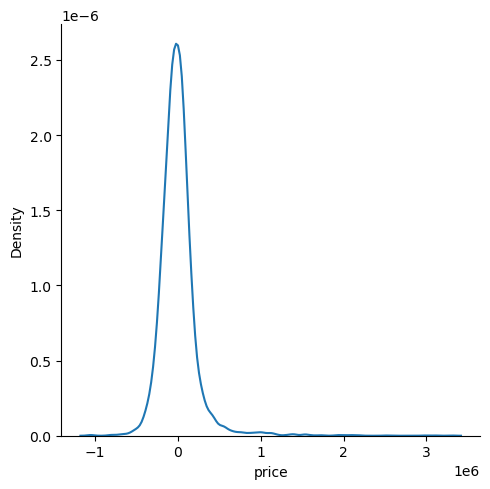

In [17]:
sns.displot(y_test-pred,kind='kde')

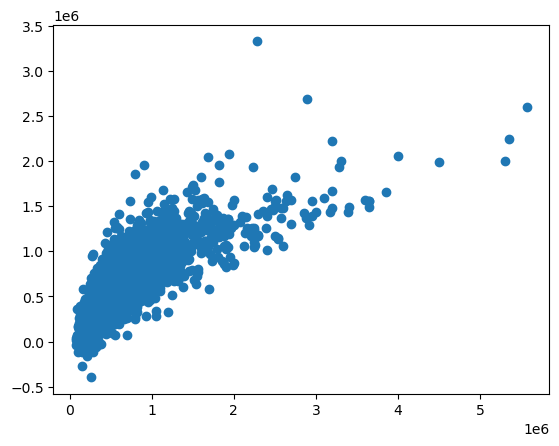

In [18]:
plt.scatter(y_test,pred)

In [19]:
# Calculate the Errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 143752.81310945412
MSE: 54767388208.10272
RMSE: 234024.3325128879


In [20]:
import pickle
pickle.dump(regr,open('regmodel.pkl','wb'))
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [21]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [22]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [23]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.788813277223834


In [24]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long
0,3,1.00,1180,5650,1.0,7,1180,0,0,98178,47.5112,-122.257
1,3,2.25,2570,7242,2.0,7,2170,400,1991,98125,47.7210,-122.319
2,2,1.00,770,10000,1.0,6,770,0,0,98028,47.7379,-122.233
3,4,3.00,1960,5000,1.0,7,1050,910,0,98136,47.5208,-122.393
4,3,2.00,1680,8080,1.0,8,1680,0,0,98074,47.6168,-122.045
